# Исследование 

двух датасетов для предсказания сердечных заболеваний.


Контекст: основной причиной смерти в развитых странах являются болезни сердца. Поэтому необходимо проделать работу, чтобы помочь предотвратить риск сердечного приступа или инсульта.

датасеты взяты отсюда:

https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score

In [2]:
#задание констант
STATE = 12345


## Чтение датасетов
и предварительный анализ

In [3]:
d4 = pd.read_csv('3/Heart_Disease_Prediction.csv')

In [4]:
d5 = pd.read_csv('4/heart_disease_uci.csv')

In [5]:
d4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
d4

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [7]:
d5.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 445.8 KB


In [8]:
#проверка полных дубликатов строк
d4.duplicated().sum()

0

In [9]:
#проверка полных дубликатов строк
d5.duplicated().sum()

0

В обоих датасетах нет полных дубликатов строк

In [10]:
#удаление колонки id в датасете d5
d5 = d5.drop('id', axis=1)

In [11]:
d5

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [12]:
#проверка полных дубликатов строк
d5.duplicated().sum()

2

In [13]:
#удаление дубликатов в d5
d5 = d5.drop_duplicates()

In [14]:
#проверка полных дубликатов строк
d5.duplicated().sum()

0

Оба датасета имеют похожие столбцы. 

Поэтому есть идея найти одинаковые столцы, переименовать их, привести данные к одному виду и обьединить оба датасета в один

Замена в датасете d5 значений в столбце num всех значений не равных нулю на 1.

То есть для упрощения, все стадии заболевания (1,2,3,4 = stages of heart disease) сердца заменим на 1

In [15]:
(d5['num'] == 0).sum()

410

In [16]:
d5['num'] = d5['num'].apply(lambda x: 1 if x > 0 else 0)

/tmp/ipykernel_24553/142633088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5['num'] = d5['num'].apply(lambda x: 1 if x > 0 else 0)


In [17]:
(d5['num'] == 0).sum()

410

In [18]:
d5['num'].unique()

array([0, 1])

In [19]:
d5.dataset.unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [20]:
#распределение заболевания по всей выборке
d5.num.value_counts(normalize=True)

1    0.553377
0    0.446623
Name: num, dtype: float64

<AxesSubplot:>

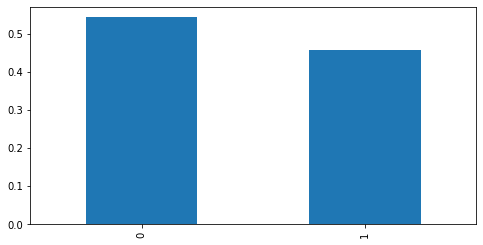

In [21]:
d5.loc[d5['dataset'] == 'Cleveland'].num.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(8,4))

<AxesSubplot:>

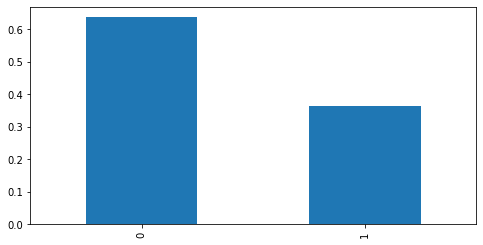

In [22]:
d5.loc[d5['dataset'] == 'Hungary'].num.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(8,4))

<AxesSubplot:>

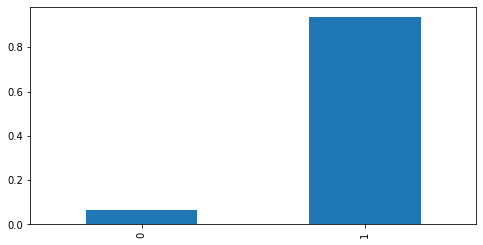

In [23]:
d5.loc[d5['dataset'] == 'Switzerland'].num.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(8,4))

<AxesSubplot:>

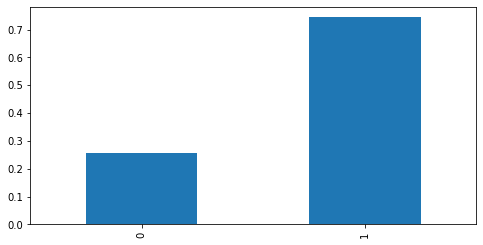

In [24]:
d5.loc[d5['dataset'] == 'VA Long Beach'].num.value_counts(normalize=True).sort_index().plot(kind='bar', figsize=(8,4))

Согласно описанию столбцов, 0 означает что НЕТ заболевания сердца.

И согласно графикам это число явно зависит от места где взят датасет. По каким-то причинам в датасетах из 'Switzerland' и 'VA Long Beach' заболевших больше чем в других датасетах. Видимо в этих больницах больше заболевших с заболевание м сердца.

Принимаю решение эту колонку удалить, так как предсказывать болезнь на основании "места датасета" не логично.

In [25]:
d5 = d5.drop('dataset', axis=1)

In [26]:
d5

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [27]:
d4

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


#### Приведение названий всех столбцов к одинаковым

In [28]:
d4.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [29]:
d4.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_press', 'cholesterol', 'fbs_ovr_120',
       'ekg_res', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'Num__vessels_fluro', 'thallium', 'target']

In [30]:
#проверка
d4

,age,sex,chest_pain_type,resting_blood_press,cholesterol,fbs_ovr_120,ekg_res,max_hr,exercise_angina,st_depression,slope_of_st,Num__vessels_fluro,thallium,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [31]:
d5.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [32]:
['age', 'sex', 'chest_pain_type', 'resting_blood_press', 'cholesterol', 'fbs_ovr_120',
       'ekg_res', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'Num__vessels_fluro', 'thallium', 'target']

['age',
 'sex',
 'chest_pain_type',
 'resting_blood_press',
 'cholesterol',
 'fbs_ovr_120',
 'ekg_res',
 'max_hr',
 'exercise_angina',
 'st_depression',
 'slope_of_st',
 'Num__vessels_fluro',
 'thallium',
 'target']

In [33]:
d5.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_press', 'cholesterol', 'fbs_ovr_120', 'ekg_res', 'max_hr',
       'exercise_angina', 'st_depression', 'slope_of_st', 'Num__vessels_fluro', 'thallium', 'target']

In [34]:
d5

,age,sex,chest_pain_type,resting_blood_press,cholesterol,fbs_ovr_120,ekg_res,max_hr,exercise_angina,st_depression,slope_of_st,Num__vessels_fluro,thallium,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


### Приведение значений в столбцах к одинаковым для двух датасетов

###### столбец sex - пол

In [35]:
d4.sex.value_counts()

1    183
0     87
Name: sex, dtype: int64

In [36]:
d5.sex.value_counts()

Male      725
Female    193
Name: sex, dtype: int64

Видимо 1 это Male, а 0 Female.


Замена Male на 1, а Female на 0. Для датасета d5

In [37]:
d5.loc[d5.sex == 'Male', 'sex'] = 1

In [38]:
d5.sex

0           1
1           1
2           1
3           1
4      Female
        ...  
915    Female
916         1
917         1
918         1
919         1
Name: sex, Length: 918, dtype: object

In [39]:
d5.loc[d5.sex == 'Female', 'sex'] = 0

In [40]:
#проверка
d5.sex.value_counts()

1    725
0    193
Name: sex, dtype: int64

###### столбец - chest_pain_type

<AxesSubplot:>

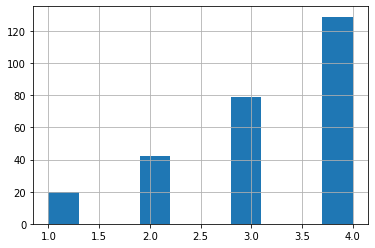

In [41]:
d4.chest_pain_type.hist()

In [42]:
d5.chest_pain_type.value_counts()

asymptomatic       496
non-anginal        203
atypical angina    173
typical angina      46
Name: chest_pain_type, dtype: int64

<AxesSubplot:>

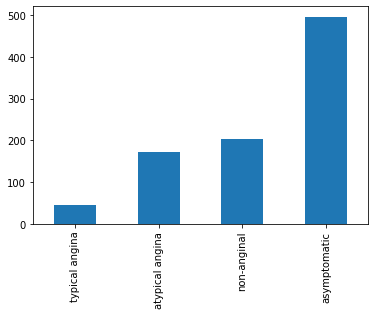

In [43]:
d5.chest_pain_type.value_counts(ascending=True).plot(kind='bar')

In [44]:
d5.chest_pain_type.unique()


array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

Судя по всему:

typical angina - 1

atypical angina - 2

non-anginal - 3

asymptomatic - 4

Произведу замену согласно в d5 этой таблице

In [45]:
#функция для замены
def replace_func(value):
    if value == 'typical angina': return 1
    if value == 'atypical angina': return 2
    if value == 'non-anginal': return 3
    if value == 'asymptomatic': return 4



In [46]:
d5.chest_pain_type = d5.chest_pain_type.apply(replace_func)

<AxesSubplot:>

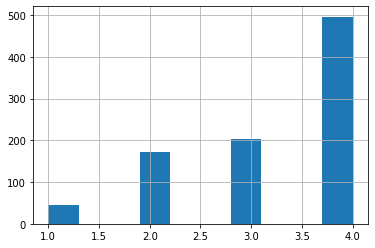

In [47]:
#проверка
d5.chest_pain_type.hist()

###### столбец - resting_blood_press

In [48]:
d4.resting_blood_press.isna().sum()

0

<AxesSubplot:>

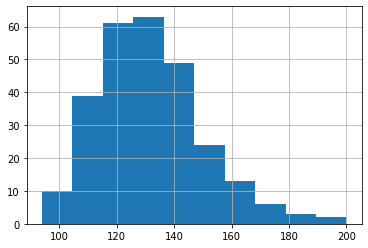

In [49]:
d4.resting_blood_press.hist()

In [50]:
d5.resting_blood_press.isna().sum()

59

<AxesSubplot:>

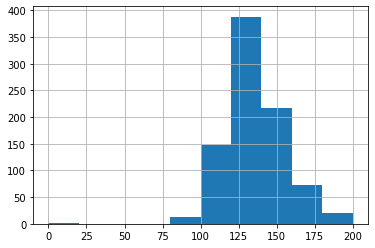

In [51]:
d5.resting_blood_press.hist()

<AxesSubplot:>

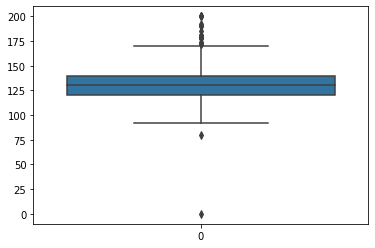

In [52]:
sns.boxplot(data=d5.resting_blood_press)

In [53]:
d5.query('resting_blood_press < 50')

,age,sex,chest_pain_type,resting_blood_press,cholesterol,fbs_ovr_120,ekg_res,max_hr,exercise_angina,st_depression,slope_of_st,Num__vessels_fluro,thallium,target
753,55,1,3,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,1


такой пациент один, принимаю решение удалить всю строку

In [54]:
d5 = d5.query('resting_blood_press != 0')

<AxesSubplot:>

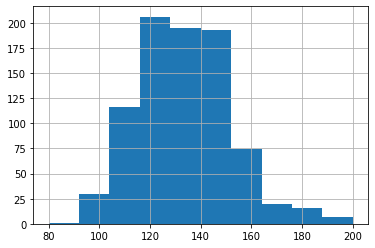

In [55]:
d5.resting_blood_press.hist()

In [56]:
d5.resting_blood_press.isna().sum()

59

In [57]:
d5.shape

(917, 14)

In [58]:
59/917

0.064340239912759

6.4% NaN, в принципе можно удалить строки, так как таких данных менее 10%, но датасет и так небольшой, поэтому заменяю на медиану

In [59]:
d5.resting_blood_press = d5.resting_blood_press.fillna(d5.resting_blood_press.median())

/tmp/ipykernel_24553/903416281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.resting_blood_press = d5.resting_blood_press.fillna(d5.resting_blood_press.median())


In [60]:
d5.resting_blood_press.isna().sum()

0

<AxesSubplot:>

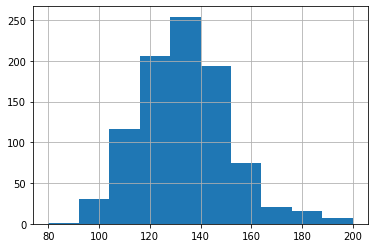

In [61]:
d5.resting_blood_press.hist()

###### столбец - cholesterol

In [62]:
d4.cholesterol.isna().sum()

0

<AxesSubplot:>

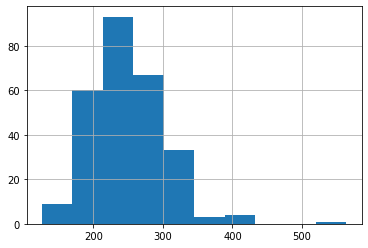

In [63]:
d4.cholesterol.hist()

In [64]:
d4.query('cholesterol > 450')

,age,sex,chest_pain_type,resting_blood_press,cholesterol,fbs_ovr_120,ekg_res,max_hr,exercise_angina,st_depression,slope_of_st,Num__vessels_fluro,thallium,target
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence


In [65]:
median = d4.query('cholesterol < 450').cholesterol.median()

In [66]:
median

245.0

In [67]:
#замена на медиану
d4.loc[d4.cholesterol > 450, 'cholesterol'] = median

<AxesSubplot:>

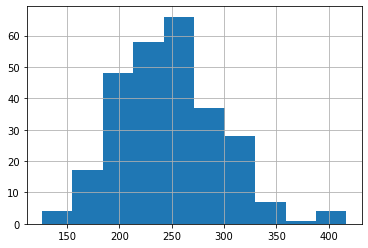

In [68]:
d4.cholesterol.hist()

<AxesSubplot:>

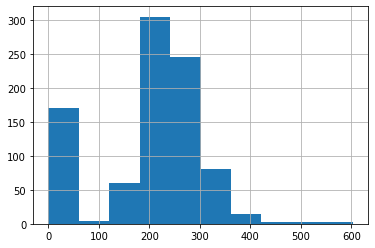

In [69]:
d5.cholesterol.hist()

In [70]:
d5.cholesterol.isna().sum()

29

In [71]:
d5.query('cholesterol < 80').cholesterol.max()

0.0

In [72]:
median = d5.query('cholesterol > 80').cholesterol.median()

In [73]:
median

240.0

In [74]:
#замена на медиану
d5.loc[d5.cholesterol > 450, 'cholesterol'] = median

In [75]:
#замена на медиану
d5.loc[d5.cholesterol < 80, 'cholesterol'] = median

In [76]:
#замена на медиану
d5.cholesterol = d5.cholesterol.fillna(median)

/tmp/ipykernel_24553/3477195227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.cholesterol = d5.cholesterol.fillna(median)


<AxesSubplot:>

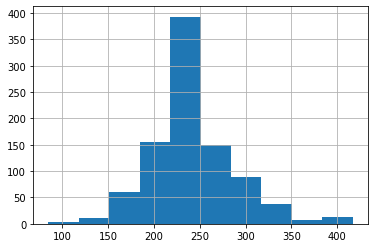

In [77]:
d5.cholesterol.hist()

###### столбец - fbs_ovr_120

In [78]:
d4.fbs_ovr_120.value_counts(normalize=True)

0    0.851852
1    0.148148
Name: fbs_ovr_120, dtype: float64

In [79]:
d5.fbs_ovr_120.value_counts(normalize=True)

False    0.833132
True     0.166868
Name: fbs_ovr_120, dtype: float64

In [80]:
d5.fbs_ovr_120 = d5.fbs_ovr_120.replace({True: 1, False: 0})

/tmp/ipykernel_24553/979488290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.fbs_ovr_120 = d5.fbs_ovr_120.replace({True: 1, False: 0})


In [81]:
d5.fbs_ovr_120.value_counts(normalize=True)

0.0    0.833132
1.0    0.166868
Name: fbs_ovr_120, dtype: float64

In [82]:
d5.fbs_ovr_120.isna().sum()

90

In [83]:
#замена пропусков на 0, как наиболее часто встречающееся
d5.fbs_ovr_120 = d5.fbs_ovr_120.fillna(0)

/tmp/ipykernel_24553/118855828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.fbs_ovr_120 = d5.fbs_ovr_120.fillna(0)


In [84]:
d5.fbs_ovr_120.isna().sum()

0

In [85]:
d5.fbs_ovr_120.value_counts(normalize=True)

0.0    0.849509
1.0    0.150491
Name: fbs_ovr_120, dtype: float64

После замены соотношение классов выровнялось

In [86]:
###### столбец - ekg_res

In [87]:
d4.ekg_res.value_counts()

2    137
0    131
1      2
Name: ekg_res, dtype: int64

In [88]:
d5.ekg_res.value_counts()

normal              549
lv hypertrophy      188
st-t abnormality    178
Name: ekg_res, dtype: int64

In [89]:
d5.ekg_res.unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [90]:
d5.ekg_res.isna().sum()

2

https://archive.ics.uci.edu/ml/datasets/Heart+Disease отсюда известно что:
    
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

Согласно этому преобразую значения для датасета d5

In [91]:
d5.loc[d5.ekg_res == 'normal', 'ekg_res'] = 0

In [92]:
d5.loc[d5.ekg_res == 'lv hypertrophy', 'ekg_res'] = 2

In [93]:
d5.loc[d5.ekg_res == 'st-t abnormality', 'ekg_res'] = 1

In [94]:
d5.ekg_res.value_counts()

0    549
2    188
1    178
Name: ekg_res, dtype: int64

In [95]:
#замена пропусков на 0, как наиболее часто встречающееся
d5.ekg_res = d5.ekg_res.fillna(0)

/tmp/ipykernel_24553/281786859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.ekg_res = d5.ekg_res.fillna(0)


In [96]:
d5.ekg_res.unique()

array([2, 0, 1])

###### столбец - max_hr

<AxesSubplot:>

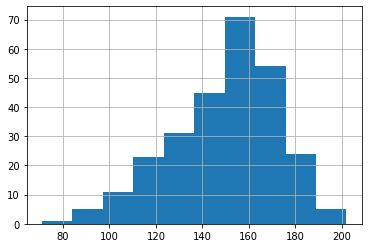

In [97]:
d4.max_hr.hist()

<AxesSubplot:>

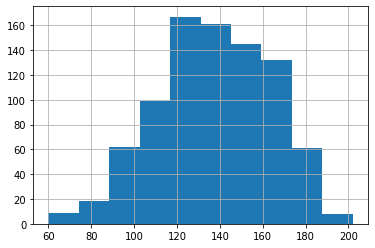

In [98]:
d5.max_hr.hist()

In [99]:
d5.max_hr.isna().sum()

55

In [100]:
#замена пропусков на медиану
d5.max_hr = d5.max_hr.fillna(d5.max_hr.median())

/tmp/ipykernel_24553/2930538454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.max_hr = d5.max_hr.fillna(d5.max_hr.median())


In [101]:
d5.max_hr.isna().sum()

0

<AxesSubplot:>

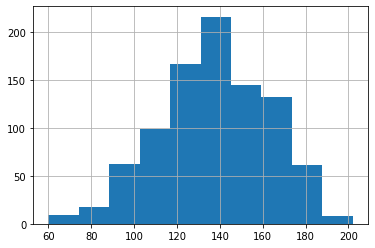

In [102]:
d5.max_hr.hist()

стало лучше похоже на датасет d4

###### столбец - exercise_angina

In [103]:
d4.exercise_angina.value_counts(normalize=True)

0    0.67037
1    0.32963
Name: exercise_angina, dtype: float64

In [104]:
d5.exercise_angina.value_counts(normalize=True)

False    0.610209
True     0.389791
Name: exercise_angina, dtype: float64

In [105]:
d5.exercise_angina.isna().sum()

55

In [106]:
d5.exercise_angina = d5.exercise_angina.replace({True: 1, False: 0})

/tmp/ipykernel_24553/3613008958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.exercise_angina = d5.exercise_angina.replace({True: 1, False: 0})


In [107]:
#замена пропусков на 0, как наиболее часто встречающееся
d5.exercise_angina = d5.exercise_angina.fillna(0)

/tmp/ipykernel_24553/2884405876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.exercise_angina = d5.exercise_angina.fillna(0)


In [108]:
d5.exercise_angina.isna().sum()

0

In [109]:
d5.exercise_angina.value_counts(normalize=True)

0.0    0.633588
1.0    0.366412
Name: exercise_angina, dtype: float64

Также, после замены, соотношения между датасетами выровнялись

###### столбец - st_depression

<AxesSubplot:>

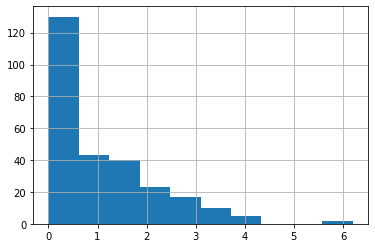

In [110]:
d4.st_depression.hist()

<AxesSubplot:>

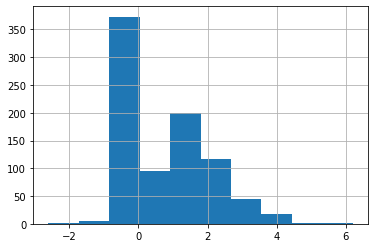

In [111]:
d5.st_depression.hist()

In [112]:
d5.st_depression.isna().sum()

62

Замена на медиану

In [113]:
d5.st_depression = d5.st_depression.fillna(d5.st_depression.median())

/tmp/ipykernel_24553/640391579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.st_depression = d5.st_depression.fillna(d5.st_depression.median())


In [114]:
d5.st_depression.isna().sum()

0

###### столбец - slope_of_st

In [115]:
d4.slope_of_st.value_counts()

1    130
2    122
3     18
Name: slope_of_st, dtype: int64

In [116]:
d5.slope_of_st.value_counts()

flat           344
upsloping      203
downsloping     63
Name: slope_of_st, dtype: int64

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Отсюда же:

41 slope: the slope of the peak exercise ST segment (наклон: наклон пикового сегмента ST при выполнении упражнений)

-- Value 1: upsloping

-- Value 2: flat

-- Value 3: downsloping 

In [117]:
d5.slope_of_st.isna().sum()

307

In [118]:
d5.slope_of_st.unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

проведем замену

In [119]:
d5.loc[d5.slope_of_st == 'downsloping', 'slope_of_st'] = 3

In [120]:
d5.loc[d5.slope_of_st == 'flat', 'slope_of_st'] = 2

In [121]:
d5.loc[d5.slope_of_st == 'upsloping', 'slope_of_st'] = 1

In [122]:
d5.slope_of_st.unique()

array([3, 2, 1, nan], dtype=object)

In [123]:
d5.slope_of_st.value_counts()

2    344
1    203
3     63
Name: slope_of_st, dtype: int64

Пропусков довольно много, я не знаю к какому типу их отнести. По идее необходимо пообщаться с медперсоналом и узнать как проще эти пропуски восстановить.

Для упрощения, заменю пропуски на класс 1, так как согласно датасету d4 этот класс наиболее многочисленный

In [124]:
d5.slope_of_st = d5.slope_of_st.fillna(1)

/tmp/ipykernel_24553/1768230362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.slope_of_st = d5.slope_of_st.fillna(1)


In [125]:
d5.slope_of_st.unique()

array([3, 2, 1])

In [126]:
d5.slope_of_st.value_counts()

1    510
2    344
3     63
Name: slope_of_st, dtype: int64

###### столбец - Num__vessels_fluro

number of major vessels (0-3) colored by flourosopy 

количество крупных сосудов (0-3), окрашенных при флюороскопии

In [127]:
d4.Num__vessels_fluro.value_counts()

0    160
1     58
2     33
3     19
Name: Num__vessels_fluro, dtype: int64

In [128]:
d5.Num__vessels_fluro.value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: Num__vessels_fluro, dtype: int64

In [129]:
d5.Num__vessels_fluro.unique()

array([ 0.,  3.,  2.,  1., nan])

In [130]:
d5.Num__vessels_fluro.isna().sum()

608

Попытка выяснить есть ли корреляция между этим параметром и целевым признаком с помощью датасета d4. Так как он не имеет пропусков.

кодирование столбца target.

Presence - 1, болезнь есть
Absence - 0, болезни нет

In [131]:
d4.target.unique()

array(['Presence', 'Absence'], dtype=object)

In [132]:
d4.loc[d4.target == 'Presence', 'target'] = 1

In [133]:
d4.loc[d4.target == 'Absence', 'target'] = 0

In [134]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  270 non-null    int64  
 1   sex                  270 non-null    int64  
 2   chest_pain_type      270 non-null    int64  
 3   resting_blood_press  270 non-null    int64  
 4   cholesterol          270 non-null    int64  
 5   fbs_ovr_120          270 non-null    int64  
 6   ekg_res              270 non-null    int64  
 7   max_hr               270 non-null    int64  
 8   exercise_angina      270 non-null    int64  
 9   st_depression        270 non-null    float64
 10  slope_of_st          270 non-null    int64  
 11  Num__vessels_fluro   270 non-null    int64  
 12  thallium             270 non-null    int64  
 13  target               270 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 29.7+ KB


In [135]:
d4.target = d4.target.astype(int)

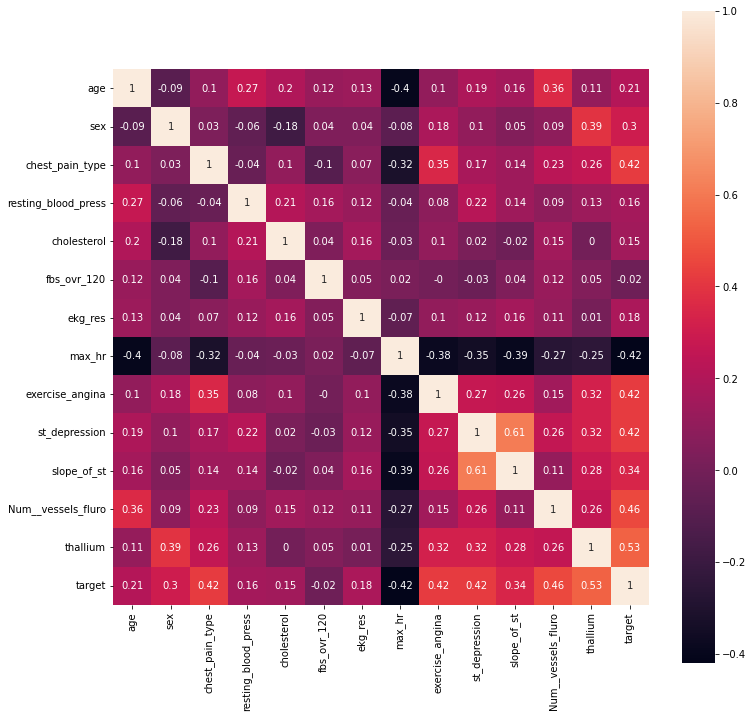

In [136]:
#heatmap для матрицы корреляций для d4
plt.figure(figsize = (12,12))
sns.heatmap(d4.corr().round(2), annot=True, square=True)
None

Итак: есть довольно сильная корреляция между целевым признаком `target` и параметром `Num__vessels_fluro`.

Не хочется терять такой важный признак в датасете d5

<AxesSubplot:xlabel='Num__vessels_fluro', ylabel='age'>

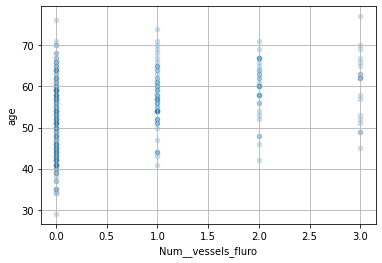

In [137]:
d4.plot(x='Num__vessels_fluro', y='age', kind='scatter', grid=True, alpha=0.2)

In [138]:
d5_w_nan = d5[~d5['Num__vessels_fluro'].isnull()]

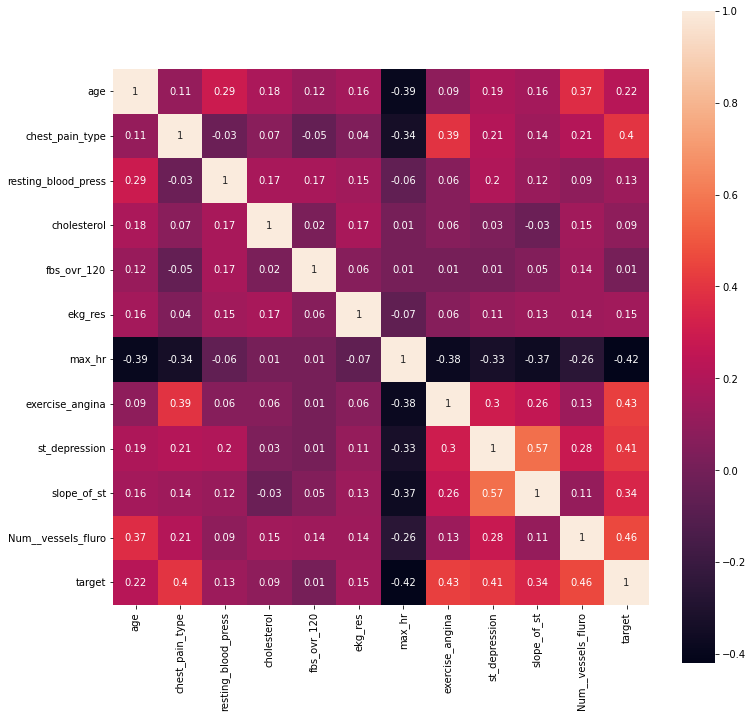

In [139]:
#heatmap для матрицы корреляций для d5 без пропущенных значений в столбце Num__vessels_fluro
plt.figure(figsize = (12,12))
sns.heatmap(d5_w_nan.corr().round(2), annot=True, square=True)
None

в датасете d5 так же корреляция параметра `Num__vessels_fluro` и `target` довольно сильная, около 0.46.

Восстановить данные в этом столбце сложно, поэтому принимаю решение заменить на медиану

Ниже была попытка получить пропущенные значения с помощью обучения простой модели на имеющихся значениях.

Качество модели оказалось низкое. Поэтому принято решение заменить на медиану.

In [140]:
d4.Num__vessels_fluro.median()

0.0

In [141]:
d5.Num__vessels_fluro.median()

0.0

In [142]:
d5.Num__vessels_fluro = d5.Num__vessels_fluro.fillna(0)

/tmp/ipykernel_24553/3908100246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.Num__vessels_fluro = d5.Num__vessels_fluro.fillna(0)


In [143]:
d5.Num__vessels_fluro.isna().sum()

0

###### столбец - thallium

51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

<AxesSubplot:>

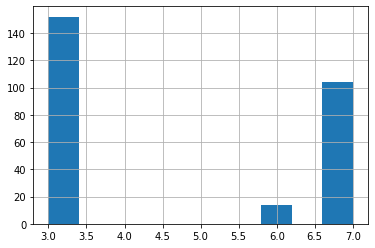

In [144]:
d4.thallium.hist()

In [145]:
d4.thallium.unique()

array([3, 7, 6])

In [146]:
d4.thallium.value_counts(normalize=True)

3    0.562963
7    0.385185
6    0.051852
Name: thallium, dtype: float64

<AxesSubplot:>

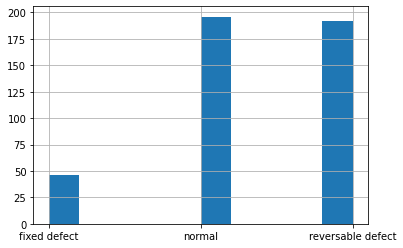

In [147]:
d5.thallium.hist()

In [148]:
d5.thallium.unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [149]:
d5.thallium.value_counts(normalize=True)

normal               0.451613
reversable defect    0.442396
fixed defect         0.105991
Name: thallium, dtype: float64

In [150]:
d5.thallium.isna().sum()

483

In [151]:
d5.loc[d5.thallium == 'fixed defect', 'thallium'] = 6

In [152]:
d5.loc[d5.thallium == 'normal', 'thallium'] = 3

In [153]:
d5.loc[d5.thallium == 'reversable defect', 'thallium'] = 7

In [154]:
d5.thallium.value_counts(normalize=True)

3    0.451613
7    0.442396
6    0.105991
Name: thallium, dtype: float64

In [155]:
#замена пропусков на медиану

In [156]:
#замена пропусков на normal=3, как наиболее часто встречающееся
d5.thallium = d5.thallium.fillna(3)

/tmp/ipykernel_24553/296718796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5.thallium = d5.thallium.fillna(3)


<AxesSubplot:>

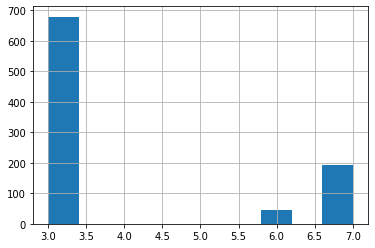

In [157]:
d5.thallium.hist()

In [158]:
d5.thallium.value_counts(normalize=True)

3    0.740458
7    0.209378
6    0.050164
Name: thallium, dtype: float64

In [159]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  270 non-null    int64  
 1   sex                  270 non-null    int64  
 2   chest_pain_type      270 non-null    int64  
 3   resting_blood_press  270 non-null    int64  
 4   cholesterol          270 non-null    int64  
 5   fbs_ovr_120          270 non-null    int64  
 6   ekg_res              270 non-null    int64  
 7   max_hr               270 non-null    int64  
 8   exercise_angina      270 non-null    int64  
 9   st_depression        270 non-null    float64
 10  slope_of_st          270 non-null    int64  
 11  Num__vessels_fluro   270 non-null    int64  
 12  thallium             270 non-null    int64  
 13  target               270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [160]:
d4.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_blood_press    0
cholesterol            0
fbs_ovr_120            0
ekg_res                0
max_hr                 0
exercise_angina        0
st_depression          0
slope_of_st            0
Num__vessels_fluro     0
thallium               0
target                 0
dtype: int64

In [161]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 919
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  917 non-null    int64  
 1   sex                  917 non-null    object 
 2   chest_pain_type      917 non-null    int64  
 3   resting_blood_press  917 non-null    float64
 4   cholesterol          917 non-null    float64
 5   fbs_ovr_120          917 non-null    float64
 6   ekg_res              917 non-null    int64  
 7   max_hr               917 non-null    float64
 8   exercise_angina      917 non-null    float64
 9   st_depression        917 non-null    float64
 10  slope_of_st          917 non-null    int64  
 11  Num__vessels_fluro   917 non-null    float64
 12  thallium             917 non-null    int64  
 13  target               917 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 107.5+ KB


In [162]:
d5.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_blood_press    0
cholesterol            0
fbs_ovr_120            0
ekg_res                0
max_hr                 0
exercise_angina        0
st_depression          0
slope_of_st            0
Num__vessels_fluro     0
thallium               0
target                 0
dtype: int64

In [163]:
d5.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_press', 'cholesterol',
       'fbs_ovr_120', 'ekg_res', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'Num__vessels_fluro', 'thallium', 'target'],
      dtype='object')

In [164]:
col_to_trans = ['age', 'sex', 'chest_pain_type', 'resting_blood_press', 'cholesterol',
       'fbs_ovr_120', 'ekg_res', 'max_hr', 'exercise_angina', 
    #'st_depression',
       'slope_of_st', 'Num__vessels_fluro', 'thallium', 'target']

In [165]:
d5[col_to_trans] = d5[col_to_trans].astype(int)

/tmp/ipykernel_24553/4136589254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d5[col_to_trans] = d5[col_to_trans].astype(int)


In [166]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 919
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  917 non-null    int64  
 1   sex                  917 non-null    int64  
 2   chest_pain_type      917 non-null    int64  
 3   resting_blood_press  917 non-null    int64  
 4   cholesterol          917 non-null    int64  
 5   fbs_ovr_120          917 non-null    int64  
 6   ekg_res              917 non-null    int64  
 7   max_hr               917 non-null    int64  
 8   exercise_angina      917 non-null    int64  
 9   st_depression        917 non-null    float64
 10  slope_of_st          917 non-null    int64  
 11  Num__vessels_fluro   917 non-null    int64  
 12  thallium             917 non-null    int64  
 13  target               917 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 107.5 KB


<div class="alert alert-block alert-info">
    
Ниже, попытка получить пропущенные значения с помощью обучения моделей на имеющихся значениях

###### модель - случайный лес

<div class="alert alert-block alert-info">
    
Выше, попытка получить пропущенные значения с помощью обучения моделей на имеющихся значениях

### Склеивание двух датасетов

In [167]:
alles = d4.append(d5, ignore_index=True).reset_index().drop('index',  axis=1)

/tmp/ipykernel_24553/1736784274.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alles = d4.append(d5, ignore_index=True).reset_index().drop('index',  axis=1)


In [168]:
alles

,age,sex,chest_pain_type,resting_blood_press,cholesterol,fbs_ovr_120,ekg_res,max_hr,exercise_angina,st_depression,slope_of_st,Num__vessels_fluro,thallium,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,245,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,54,0,4,127,333,1,1,154,0,0.0,1,0,3,1
1183,62,1,1,130,139,0,1,140,0,0.5,1,0,3,0
1184,55,1,4,122,223,1,1,100,0,0.0,1,0,6,1
1185,58,1,4,130,385,1,2,140,0,0.5,1,0,3,0


In [169]:
alles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1187 non-null   int64  
 1   sex                  1187 non-null   int64  
 2   chest_pain_type      1187 non-null   int64  
 3   resting_blood_press  1187 non-null   int64  
 4   cholesterol          1187 non-null   int64  
 5   fbs_ovr_120          1187 non-null   int64  
 6   ekg_res              1187 non-null   int64  
 7   max_hr               1187 non-null   int64  
 8   exercise_angina      1187 non-null   int64  
 9   st_depression        1187 non-null   float64
 10  slope_of_st          1187 non-null   int64  
 11  Num__vessels_fluro   1187 non-null   int64  
 12  thallium             1187 non-null   int64  
 13  target               1187 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 130.0 KB


###### Перемешивание данных в датасете

In [170]:
alles = shuffle(alles).reset_index().drop('index',  axis=1)

In [171]:
alles

,age,sex,chest_pain_type,resting_blood_press,cholesterol,fbs_ovr_120,ekg_res,max_hr,exercise_angina,st_depression,slope_of_st,Num__vessels_fluro,thallium,target
0,48,1,3,110,211,0,0,138,0,0.0,1,0,6,0
1,39,1,2,120,200,0,0,160,1,1.0,2,0,3,0
2,56,1,4,130,283,1,2,103,1,1.6,3,0,7,1
3,57,0,4,128,303,0,2,159,0,0.0,1,1,3,0
4,54,1,3,120,217,0,0,137,0,0.0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,44,0,3,108,141,0,0,175,0,0.6,2,0,3,0
1183,52,1,2,120,284,0,0,118,0,0.0,1,0,3,0
1184,42,1,2,120,196,0,0,150,0,0.0,1,0,3,0
1185,39,1,3,140,321,0,2,182,0,0.0,1,0,3,0


In [172]:
alles.duplicated().sum()

269

In [173]:
#удаление дубликатов в alles
alles = alles.drop_duplicates()

In [174]:
alles.duplicated().sum()

0

# Выбор целевого признака

отделение на обучающую и тестовую выборки

Очевидно что целевым признаком является последняя колонка `target`

Её и выберем в качестве целевого признака

In [175]:
#отделение целевого признака из датасета alles
target = alles['target']

In [176]:
# отделение обучающую выборку
features = alles.drop(['target'] , axis=1)

In [177]:
# отделение 75% на обучающую выборку и 20% на тестовую выборку
features_train, features_test, target_train, target_test = train_test_split(
    features, 
    target, 
    test_size=0.3, 
    stratify=target, 
    random_state=STATE)

In [178]:
#проверка размеров выборок

In [179]:
features_train.shape

(642, 13)

In [180]:
target_train.shape

(642,)

In [181]:
features_test.shape

(276, 13)

In [182]:
target_test.shape

(276,)

In [183]:
#проверка сбаллансированности классов

In [184]:
target_train.mean()

0.5529595015576324

In [185]:
target_test.mean()

0.5507246376811594

Сбаллансированнойсть очень хорошая, практически 50/50

# Выбор метрики для оценки качества моделей

Метрики precision и recall показывают долю положительных обьектов по отношению к неверно определённым положительным и отрицательным обьектам. F1 мера обьединяет обе эти метрики в одну.


В этой задаче 0 означет - болезни нет, а 1 - болезнь есть.
Считаю что лучше болезнь предупредить, то есть лучше максимизировать вероятность определения больных.

Следовательно наиболее подходящая метрика для максимизации это F1 мера.


# Обучение моделей

<div class="alert alert-block alert-info">

модель - решающее дерево `DecisionTreeClassifier`

In [186]:
#логарифмическая сетка параметров для модели Дерево
params = {
    'max_depth':[8,16,32], 
    'min_samples_split':[2,4], 
    'min_samples_leaf':[2,4,8]
}

In [187]:
dt = DecisionTreeClassifier(random_state=STATE, class_weight='balanced')

In [188]:
clf = GridSearchCV(dt, params, scoring='f1', cv=10, n_jobs=-1)

In [189]:
%%time
clf.fit(features_train, target_train)

CPU times: user 140 ms, sys: 64.1 ms, total: 205 ms
Wall time: 1.23 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 32],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4]},
             scoring='f1')

In [190]:
clf.best_score_

0.7502815836082398

0.8113438329120017

In [191]:
clf.best_params_

{'max_depth': 16, 'min_samples_leaf': 8, 'min_samples_split': 2}

<div class="alert alert-block alert-info">
    
модель - случайный лес

In [192]:
#логарифмическая сетка параметров для модели Случайный Лес
params = {
    'n_estimators':[40,80,160], 
    'max_depth':[8,16,32,64], 
    'min_samples_split':[2,4], 
    'min_samples_leaf':[2,4]
}


In [193]:
rf = RandomForestClassifier(random_state=STATE, class_weight='balanced')

In [194]:
clf = GridSearchCV(rf, params, scoring='f1', cv=10, n_jobs=-1)

In [195]:
%%time
clf.fit(features_train, target_train)

CPU times: user 421 ms, sys: 10.9 ms, total: 431 ms
Wall time: 12.5 s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 32, 64],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [40, 80, 160]},
             scoring='f1')

In [196]:
clf.best_score_

0.8295003270402465

0.8716312779568176

In [197]:
clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

<div class="alert alert-block alert-info">

модель - логистическая регрессия

In [198]:
#логарифмическая сетка параметров для модели Логистическая Регрессия
params = {
    'max_iter':[100,200,400], 
    'solver':[
              'lbfgs', 
              'newton-cg', 
              'liblinear', 
              'sag', 
              'saga'
             ]
}


In [199]:
lr = LogisticRegression(random_state=STATE, class_weight='balanced')

In [200]:
clf = GridSearchCV(lr, params, scoring='f1', cv=10, n_jobs=-1)

In [201]:
%%time
clf.fit(features_train, target_train)

/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

CPU times: user 152 ms, sys: 1.31 ms, total: 154 ms
Wall time: 1.05 s


/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dron/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=12345),
             n_jobs=-1,
             param_grid={'max_iter': [100, 200, 400],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [202]:
clf.best_score_

0.8161110322148784

0.8206819763357016

In [203]:
clf.best_params_

{'max_iter': 100, 'solver': 'newton-cg'}

<div class="alert alert-block alert-info">

модель - SVM

In [204]:
parameters = {'kernel':['linear'], 
              'C':[0.01,0.1,1,10], 
             # 'gamma':['scale', 'auto']
             }

In [205]:
svc = svm.SVC(random_state=STATE, class_weight='balanced')

In [206]:
#svc = LinearSVC(random_state=0, tol=1e-5)

In [207]:
#svc = svm.SVR()

In [208]:
clf = GridSearchCV(svc, parameters, scoring='f1', cv=10, n_jobs=-1)

In [209]:
%%time
clf.fit(features_train, target_train)

CPU times: user 668 ms, sys: 5.07 ms, total: 673 ms
Wall time: 21.7 s


GridSearchCV(cv=10, estimator=SVC(class_weight='balanced', random_state=12345),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
             scoring='f1')

In [210]:
clf.best_score_

0.81936104766845

0.8172261729047954

0.8334453057973997

In [211]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

# Выбор лучшей модели

In [212]:
rf = RandomForestClassifier(random_state=STATE, 
                            class_weight='balanced',
                            n_estimators=80, 
                            max_depth=16, 
                            min_samples_split=2, 
                            min_samples_leaf=2
                           )

In [213]:
%%time
rf.fit(features_train, target_train)

CPU times: user 121 ms, sys: 0 ns, total: 121 ms
Wall time: 139 ms


RandomForestClassifier(class_weight='balanced', max_depth=16,
                       min_samples_leaf=2, n_estimators=80, random_state=12345)

In [214]:
predictions = rf.predict(features_train)

In [215]:
f1_score(target_train, predictions)

0.9518413597733711

In [216]:
predictions = rf.predict(features_test)

In [217]:
f1_score(target_test, predictions)

0.8451612903225806

лучший вариант

0.8923076923076922

In [218]:
probabilities_valid = rf.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

In [219]:
for tres in np.arange(0.4, 0.6, 0.01):
    
    predictions_tres = probabilities_one_valid > tres
    f1 = f1_score(target_test, predictions_tres)
    print(tres, f1)

0.4 0.8562691131498472
0.41000000000000003 0.8518518518518517
0.42000000000000004 0.8482972136222909
0.43000000000000005 0.85625
0.44000000000000006 0.8490566037735849
0.45000000000000007 0.8571428571428571
0.4600000000000001 0.8598726114649682
0.4700000000000001 0.8562300319488818
0.4800000000000001 0.8451612903225806
0.4900000000000001 0.8451612903225806
0.5000000000000001 0.8451612903225806
0.5100000000000001 0.8376623376623378
0.5200000000000001 0.8366013071895425
0.5300000000000001 0.8355263157894737
0.5400000000000001 0.8382838283828383
0.5500000000000002 0.8410596026490067
0.5600000000000002 0.8333333333333333
0.5700000000000002 0.8294314381270903
0.5800000000000002 0.8215488215488216
0.5900000000000002 0.8175675675675677


# Проверка на тесте

# Выводы по работе

-- -- 
сделать небольшой отчёт - что вы думаете по поводу этого датасета, насколько он был интересен, насколько трудно было добиться высоких значений метрик, что интересного заметили и др.
-- -- 

Честно говоря какие-то странные датасеты. Причём как оказалось (спасибо напарнику Никите) один датасет входит в другой датасет, то есть данные после обьединения становятся не уникальны.

Сами по себе датасеты интересны. Некоторые сложности вызывает понимание параметров. Медицинские термины и ещё и на английском сложновато понимать.

Максимум что удавалось добиться при разных гиперпараметрах, с подбором порога, f1_score 0.86

В датасете есть интересный параметр `Num__vessels_fluro`. И он имеет приличную корреляцию с целевым признаком, около 0,46. При этом в этом столбце крайне много пропусков. Было бы интересно обсудить этот параметр с врачами, может есть возможность восстановить его по другим параметрам?

